# CHAPTER 10 Introduction to Artificial Neural Networks with Keras

## From Biological to Artificial Neurons
### Biological Neurons
Before we discuss artificial neurons, let’s take a quick look at a biological neuron. It is an unusual-looking cell mostly found in animal cerebral cortexes (e.g., your brain), composed of a *cell body* containing the nucleus and most of the cell’s complex components, and many branching extensions called *dendrites*, plus one very long extension called the *axon*. The axon’s length may be just a few times longer than the cell body, or up to tens of thousands of times longer. Near its extremity the axon splits off into many branches called *telodendria*, and at the tip of these branches are minuscule structures called *synaptic terminals* , which are connected to the dendrites (or directly to the cell body) of other neurons. 

Biological neurons receive short electrical impulses called signals from other neurons via these synapses. When a neuron receives a sufficient number of signals from other neurons within a few milliseconds, it fires its own signals. 

Thus, individual biological neurons seem to behave in a rather simple way, but they are organized in a vast network of billions of neurons, each neuron typically connected to thousands of other neurons. Highly complex computations can be performed by a vast network of fairly simple neurons.

![10-1](img/10-1.jpg)

### Logical Computations with Neurons
Warren McCulloch and Walter Pitts proposed a very simple model of the biological neuron, which later became known as an artificial neuron: it has one or more binary (on/off) inputs and one binary output. The artificial neuron simply activates its output when more than a certain number of its inputs are active. McCulloch and Pitts showed that even with such a simplified model it is possible to build a network of artificial neurons that computes any logical proposition you want. 

For example, let's build a few ANNs that perform various logical computations (see Figure 10-3), assuming that a neuron is activated when at least two of its inputs are active.

![10-3](img/10-3.jpg)

* The first network on the left is simply the identity function: if neuron A is activated, then neuron C gets activated as well, but if neuron A is off, then neuron C is off as well.
* The second network performs a logical AND: neuron C is activated only when both neurons A and B are activated.
* The third network performs a logical OR: neuron C gets activated if either neuron A or neuron B is activated (or both).
* Finally, if we suppose that an input connection can inhibit the neuron’s activity, then the fourth network computes a slightly more complex logical proposition: neuron C is activated only if neuron A is active and if neuron B is off. 

### The Perceptron
The *Perceptron* is one of the simplest ANN architectures, invented in 1957 by Frank Rosenblatt. It is based on a slightly different artificial neuron called a *threshold logic unit* (TLU), or sometimes a linear threshold unit (LTU): the inputs and output are now numbers (instead of binary on/off values) and each input connection is associated with a weight. The TLU computes a weighted sum of its inputs $(z=w_1x_1+w_2x_2+\dots+w_nx_n=\pmb{X}^T\pmb{W})$, then applies a *step function* to that sum and outputs the result: 
$h_W(\pmb{X})=step(z)$, where $z=\pmb{X}^T\pmb{W}$.
![10-4](img/10-4.jpg)
The most common step function used in Perceptrons is the Heaviside step function:
$$
heaviside(z) =
\begin{cases}
0 & \text{if z<0}  \\
1 & \text{if z>0}
\end{cases}
$$
\\
$$
sgn(z) =
\begin{cases}
-1 & \text{if z<0}  \\
0 & \text{if z=0}  \\
1 & \text{if z>0}
\end{cases}
$$

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs and if the result exceeds a threshold, it outputs the positive class or else outputs the negative class (just like a Logistic Regression classifier or a linear SVM).

A Perceptron is simply composed of a single layer of TLUs, with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer, it is called a *fully connected layer* or a *dense layer*. To represent the fact that each input is sent to every TLU, it is common to draw special passthrough neurons called input neurons: they just output whatever input they are fed. All the input neurons form the input layer. Moreover, an extra bias feature is generally added $(x_0 = 1)$: it is typically represented using a special type of neuron called a *bias neuron*, which just outputs 1 all the time. A Perceptron with two inputs and three outputs is represented in Figure 10-5. This Perceptron can classify instances simultaneously into three different binary classes, which makes it a multi-output classifier.
![10-5](img\10-5.jpg)

Thanks to the magic of linear algebra, it is possible to efficiently compute the outputs of a layer of artificial neurons for several instances at once, by using Equation:
$$h_{W,b}(X)=\phi(XW+b)$$
* $X$represents the matrix of input features. It has one row per instance, one column per feature.
* The weight matrix $W$ contains all the connection weights except for the ones from the bias neuron. It has one row per input neuron and one column per artificial neuron in the layer.
* The bias vector $b$ contains all the connection weights between the bias neuron and the artificial neurons. It has one bias term per artificial neuron.
* The function $\phi$ is called the activation function: when the artificial neurons are TLUs, it is a step function.

So how is a Perceptron trained? 

This rule later became known as Hebb’s rule: the connection weight between two neurons is increased whenever they have the same output. Perceptrons are trained using a variant of this rule that takes into account the error made by the network; it reinforces connections that help reduce the error. More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every
output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction. 

$$
w_{i,j}^{(next step)}=w_{i,j}+\eta(y_j-\hat y_j)x_i
$$
* $w_{i,j}$ is the connection weight between the ith input neuron and the jth output neuron.
* $x_i$ is the ith input value of the current training instance.
* $\hat y_j$ is the output of the jth output neuron for the current training instance.
* $y_j$ is the target output of the jth output neuron for the current training instance.
* $\eta$ is the learning rate.

Scikit-Learn provides a Perceptron class that implements a single TLU network. It can be used pretty much as you would expect—for example, on the iris dataset:

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iris Setosa?
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [45]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Note that contrary to Logistic Regression classifiers, Perceptrons do not output a class probability; rather, they just make predictions based on a hard threshold. This is one of the good reasons to prefer Logistic Regression over Perceptrons.

Marvin Minsky and Seymour Papert highlighted a number of serious weaknesses of Perceptrons, in particular the fact that they are incapable of solving some trivial problems (e.g., the Exclusive OR (XOR)classification problem; see the left side of Figure 10-6). Of course this is true of any other linear classification model as well (such as Logistic Regression classifiers), but researchers had expected much more from Perceptrons, and their disappointment
was great, and many researchers dropped neural networks altogether in favor of higher-level problems such as logic, problem solving, and search.

However, it turns out that some of the limitations of Perceptrons can be eliminated by stacking multiple Perceptrons. The resulting ANN is called a *Multi-Layer Perceptron* (MLP).  In particular, an MLP can solve the XOR problem, as you can verify by computing the output of the MLP represented on the right of Figure 10-6: with inputs (0, 0) or (1, 1) the network outputs 0, and with inputs (0, 1) or (1, 0) it outputs 1. All connections have a weight equal to 1, except the four connections where the weight is shown.
![10-6](img\10-6.jpg)

### Multi-Layer Perceptron and Backpropagation
An MLP is composed of one (passthrough) *input layer*, one or more layers of TLUs, called *hidden layers*, and one final layer of TLUs called the *output layer*. The layers close to the input layer are usually called the *lower layers*, and the ones close to the outputs are usually called the *upper layers*. Every layer except the output layer includes a bias neuron and is fully connected to the next layer. When an ANN contains a deep stack of hidden layers, it is called a *deep neural network* (DNN).
![10-7](img\10-7.jpg)

For many years researchers struggled to find a way to train MLPs, without success. But in 1986, David Rumelhart, Geoffrey Hinton and Ronald Williams published a groundbreaking paper introducing the *backpropagation* training algorithm, which is still used today. In short, it is simply Gradient Descent using an efficient technique for computing the gradients automatically.

Let’s run through this algorithm in a bit more detail:
* It handles one mini-batch at a time, and it goes through the full training set multiple times. Each pass is called an *epoch*.
* Each mini-batch is passed to the network’s input layer, which just sends it to the first hidden layer. The algorithm then computes the output of all the neurons in this layer (for every instance in the mini-batch). The result is passed on to the next layer, its output is computed and passed to the next layer, and so on until we get the output of the last layer, the output layer. This is the forward pass: it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass.
* Next, the algorithm measures the network’s output error (i.e., it uses a loss function that compares the desired output and the actual output of the network, and returns some measure of the error).
* Then it computes how much each output connection contributed to the error. This is done analytically by simply applying the chain rule.
* The algorithm then measures how much of these error contributions came from each connection in the layer below, again using the chain rule—and so on until the algorithm reaches the input layer. As we explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network.
* Finally, the algorithm performs a Gradient Descent step to tweak all the connection weights in the network, using the error gradients it just computed.

SUMMARIZE: for each training instance the backpropagation algorithm first makes a prediction (forward pass), measures the error, then goes through each layer in reverse to measure the error contribution from each connection (reverse pass), and finally slightly tweaks the connection weights to reduce the error (Gradient Descent step).

In order for this algorithm to work properly, the authors made a key change to the MLP’s architecture: they replaced the step function with the logistic function, $\sigma(z)=1/(1+exp(-z))$. This was essential because the step function contains only flat segments, so there is no gradient to work with, while the logistic function has a well-defined nonzero derivative everywhere, allowing Gradient Descent to make some progress at every step. In fact, the backpropagation algorithm works well with many other activation functions, not just the logistic function. Two other popular activation functions are:

The hyperbolic tangent function: $tanh(z)=2\sigma(2z)-1$

The Rectified Linear Unit function: $ReLU(z)=max(0,z)$

These popular activation functions and their derivatives are represented in Figure 10-8.
![10-8](img\10-8.jpg)

Why do we need activation functions in the first place? 

Well, if you chain several linear transformations, all you get is a linear transformation. For example, say $f(x)=2x+3$ and $g(x)=5x-1$, then chaining these two linear functions gives you another linear function: $f(g(x))=2(5x-1)+3 = 10x+1$, So if you don't have some non-linearity between layers, then even a deep stack of layers is equivalent to a single layer: you cannot solve very complex problems with that.

### Regression MLPs
First, MLPs can be used for regression tasks. If you want to predict a single value (e.g.,the price of a house given many of its features), then you just need a single output neuron: its output is the predicted value. 

In general, when building an MLP for regression, you do not want to use any activation function for the output neurons, so they are free to output any range of values. However, if you want to guarantee that the output will always be positive, then you
can use the ReLU activation function, or the *softplus* activation function in the output layer. Finally, if you want to guarantee that the predictions will fall within a given range of values, then you can use the logistic function or the hyperbolic tangent, and scale the labels to the appropriate range.

The loss function to use during training is typically the mean squared error, but if you have a lot of outliers in the training set, you may prefer to use the mean absolute error instead. Alternatively, you can use the Huber loss, which is a combination of both.

Table 10-1 summarizes the typical architecture of a regression MLP.
![Table 10-1](img\Table10-1.jpg)

### Classification MLPs
MLPs can also be used for classification tasks. For a binary classification problem, you just need a single output neuron using the logistic activation function: the output will be a number between 0 and 1, which you can interpret as the estimated probability of the positive class. 

MLPs can also easily handle multilabel binary classification tasks. For example, you could have an email classification system that predicts whether each incoming email is ham or spam, and simultaneously predicts whether it is an urgent or non-urgent email. In this case, you would need two output neurons, both using
the logistic activation function: the first would output the probability that the email is spam and the second would output the probability that it is urgent. More generally, you would dedicate one output neuron for each positive class. Note that the output
probabilities do not necessarily add up to one. This lets the model output any combination of labels: you can have non-urgent ham, urgent ham, non-urgent spam, and perhaps even urgent spam (although that would probably be an error).

If each instance can belong only to a single class, out of 3 or more possible classes (e.g., classes 0 through 9 for digit image classification), then you need to have one output neuron per class, and you should use the softmax activation function for the
whole output layer (see Figure 10-9). The softmax function will ensure that all the estimated probabilities are between 0 and 1 and that they add up to one (which is required if the classes are exclusive). This is called multiclass classification.
![10-9](img\10-9.jpg)

Table 10-2 summarizes the typical architecture of a classification MLP.
![Table 10-2](img\Table10-2.jpg)

## Implementing MLPs with Keras
### Building an Image Classifier Using the Sequential API

First, we need to load a dataset. We will tackle Fashion MNIST, which is a drop-in replacement of MNIST. It has the exact same format as MNIST (70,000 grayscale images of 28×28 pixels each, with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse and the problem turns out to be significantly more challenging than MNIST.

Figure 10-11 shows a few samples from the Fashion MNIST dataset:
![10-11](img\10-11.jpg)

**Using Keras to Load the Dataset**

When loading MNIST or Fashion MNIST using Keras, every image is represented as a 28×28 array, the pixel intensities are represented as integers (from 0 to 255).

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

**Creating the Model Using the Sequential API**

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [9]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [12]:
model.layers[1].name

'dense_3'

In [13]:
model.get_layer('dense_3').name

'dense_3'

**Compiling the Model**

After a model is created, you must call its compile() method to specify the loss function and the optimizer to use.

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

**Training and Evaluating the Model**

We pass it the input features (X_train) and the target classes (y_train), as well as the number of epochs to train. We also pass a validation set (this is optional): Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs: if the performance on the training set is much better than on the validation set, your model is probably overfitting the training set.

In [18]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9992 - accuracy: 0.6805 - val_loss: 0.5132 - val_accuracy: 0.8258
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5060 - accuracy: 0.8244 - val_loss: 0.4603 - val_accuracy: 0.8402
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4535 - accuracy: 0.8409 - val_loss: 0.4180 - val_accuracy: 0.8574
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4195 - accuracy: 0.8537 - val_loss: 0.4326 - val_accuracy: 0.8460
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4038 - accuracy: 0.8611 - val_loss: 0.3869 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3778 - accuracy: 0.8678 - val_loss: 0.3791 - val_accuracy: 0.8690
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3667 - accuracy: 0.8708 - val_loss: 0.3624 - val_accuracy:

The fit() method returns a History object containing the training parameters (history.params), the list of epochs it went through (history.epoch), and most importantly a dictionary (history.history) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set. We can get the learning curves.

You can see that both the training and validation accuracy steadily increase during training, while the training and validation loss decrease. Moreover, the validation curves are quite close to the training curves, which means that there is not too much overfitting.

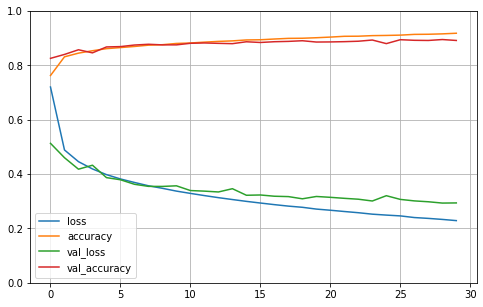

In [19]:
import pandas as pd
from matplotlib import pyplot as plt 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 65.6531 - accuracy: 0.8455


[65.65312194824219, 0.8454999923706055]

**Using the Model to Make Predictions**

![pred](img\pred.jpg)

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
y_pred = model.predict_classes(X_new)
y_pred

E:\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

In [23]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [24]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

### Building a Regression MLP Using the Sequential API
Let’s switch to the California housing problem and tackle it using a regression neural network.

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [26]:
model = keras.models.Sequential([
     keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
     keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)
X_new = X_test_scaled[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6325 - val_loss: 0.5606
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5227 - val_loss: 0.5078
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4831 - val_loss: 0.4751
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4500 - val_loss: 0.4843
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4600 - val_loss: 0.4638
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4463 - val_loss: 0.4546
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4464 - val_loss: 0.4523
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4160 - val_loss: 0.4368
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4315 - val_loss: 0.4316
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5361 - val_loss: 0.4755

### Building Complex Models Using the Functional API
One example of a non-sequential neural network is a *Wide & Deep* neural network. This neural network architecture was introduced in a 2016 paper by Heng-Tze Cheng et al. It connects all or part of the inputs directly to the output layer, as shown in Figure 10-13. This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path).
![10-13](img\10-13.jpg)

In [27]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

What if you want to send a subset of the features through the wide path, and a different subset (possibly overlapping) through the deep path (see Figure 10-14)? 
![10-14](img\10-14.jpg)
In this case, one solution is to use multiple inputs. For example, suppose we want to send 5 features through the deep path (features 0 to 4), and 6 features through the wide path (features 2 to 7):

In [28]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [29]:
model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train_scaled[:, :5], X_train_scaled[:, 2:]
X_valid_A, X_valid_B = X_valid_scaled[:, :5], X_valid_scaled[:, 2:]
X_test_A, X_test_B = X_test_scaled[:, :5], X_test_scaled[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5832 - val_loss: 0.5492
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5084 - val_loss: 0.5166
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4681 - val_loss: 0.4887
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4607 - val_loss: 0.4639
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4638 - val_loss: 0.5560
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4376 - val_loss: 0.4475
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4367 - val_loss: 0.4389
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4217 - val_loss: 0.4249
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4153 - val_loss: 0.4293
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4036 - val_loss: 0.4089

There are also many use cases in which you may want to have multiple outputs:
* The task may demand it, for example you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task.
* Similarly, you may have multiple independent tasks to perform based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks.
* Another use case is as a regularization technique. For example, you may want to add some auxiliary outputs in a neural network architecture (see Figure 10-15) to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.
![10-15](img\10-15.jpg)

In [30]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [31]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [32]:
history = model.fit(
     [X_train_A, X_train_B], [y_train, y_train], epochs=20,
     validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.5079 - dense_16_loss: 1.3731 - dense_17_loss: 2.7214 - val_loss: 0.6172 - val_dense_16_loss: 0.5512 - val_dense_17_loss: 1.2114
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5801 - dense_16_loss: 0.5200 - dense_17_loss: 1.1204 - val_loss: 0.5549 - val_dense_16_loss: 0.5062 - val_dense_17_loss: 0.9932
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5552 - dense_16_loss: 0.5103 - dense_17_loss: 0.9590 - val_loss: 0.5132 - val_dense_16_loss: 0.4757 - val_dense_17_loss: 0.8499
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4954 - dense_16_loss: 0.4590 - dense_17_loss: 0.8233 - val_loss: 0.4953 - val_dense_16_loss: 0.4651 - val_dense_17_loss: 0.7671
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4708 - dense_16_loss: 0.4419 - dense_17_loss: 0.7312 - val_loss: 0.4808 - val_dense_16_loss: 0.4528 - val_de

In [33]:
total_loss, main_loss, aux_loss = model.evaluate(
     [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 966us/step - loss: 0.3523 - dense_16_loss: 0.3427 - dense_17_loss: 0.4382


In [34]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

### Building Dynamic Models Using the Subclassing API
Both the Sequential API and the Functional API are declarative: you start by declaring which layers you want to use and how they should be connected, and only then can you start feeding the model some data for training or inference. 

This has many advantages: the model can easily be saved, cloned, shared, its structure can be displayed and analyzed, the framework can infer shapes and check types, so errors can be caught early. It's also fairly easy to debug, since the whole model is just a static graph of layers. But the flip side is just that: it's static. Some models involve loops, varying shapes, conditional branching, and other dynamic behaviors. For such cases, or simply if you prefer a more imperative programming style, the Subclassing API is for you.

In [35]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

## Fine-Tuning Neural Network Hyperparameters
The flexibility of neural networks is also one of their main drawbacks: there are many hyperparameters to tweak. Not only can you use any imaginable network architecture, but even in a simple MLP you can change the number of layers, the number of neurons per layer, the type of activation function to use in each layer, the weight initialization logic, and much more. How do you know what combination of hyperparameters is the best for your task?

One option is to simply try many combinations of hyperparameters and see which one works best on the validation set (or using K-fold cross-validation). For this, one approach is simply use GridSearchCV or RandomizedSearchCV to explore the hyperparameter space. For this, we need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors. The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

In [36]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    options = {"input_shape": input_shape}
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

Next, let’s create a KerasRegressor based on this build_model() function:

In [37]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

Now we can use this object like a regular Scikit-Learn regressor: we can train it using its fit() method, then evaluate it using its score() method, and use it to make predictions using its predict() method. 

In [38]:
keras_reg.fit(X_train_scaled, y_train, epochs=100,
              validation_data=(X_valid_scaled, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test_scaled, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 3.1050 - val_loss: 0.6529
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6084 - val_loss: 0.5600
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5469 - val_loss: 0.5413
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4900 - val_loss: 0.5131
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4838 - val_loss: 0.5037
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5072 - val_loss: 0.4933
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4867 - val_loss: 0.4915
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4845 - val_loss: 0.4855
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5026 - val_loss: 0.4748
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4710 - val_lo

However, we do not actually want to train and evaluate a single model like this, we want to train hundreds of variants and see which one performs best on the validation set. Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search. Let’s try to explore the number of hidden layers, the number of neurons and the learning rate:

In [39]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train_scaled, y_train, epochs=100,
                  validation_data=(X_valid_scaled, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 3.0229 - val_loss: 0.8950
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7563 - val_loss: 0.7056
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6396 - val_loss: 0.6525
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5843 - val_loss: 0.6161
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5836 - val_loss: 0.5875
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5615 - val_loss: 0.5649
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5533 - val_loss: 0.5473
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5193 - val_loss: 0.5342
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5215 - val_loss: 0.5235
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4803 - val_lo

Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3585 - val_loss: 0.3882
Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3589 - val_loss: 0.3873
Epoch 63/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3523 - val_loss: 0.3869
Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3451 - val_loss: 0.3847
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3513 - val_loss: 0.3852
Epoch 66/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3500 - val_loss: 0.3855
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3347 - val_loss: 0.3821
Epoch 68/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3475 - val_loss: 0.3815
Epoch 69/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3525 - val_loss: 0.3853
Epoch 70/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3520

Epoch 20/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4161 - val_loss: 0.4249
Epoch 21/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3941 - val_loss: 0.4199
Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3887 - val_loss: 0.4205
Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4023 - val_loss: 0.4189
Epoch 24/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3782 - val_loss: 0.4155
Epoch 25/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3870 - val_loss: 0.4147
Epoch 26/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4116 - val_loss: 0.4135
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3699 - val_loss: 0.4169
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3737 - val_loss: 0.4075
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3872

Epoch 80/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3243 - val_loss: 0.3700
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3217 - val_loss: 0.3671
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3286 - val_loss: 0.3692
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3325 - val_loss: 0.3729
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3290 - val_loss: 0.3680
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3231 - val_loss: 0.3677
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3368 - val_loss: 0.3655
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3395 - val_loss: 0.3670
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3269 - val_loss: 0.3668
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3221

Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5599 - val_loss: 0.5987
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5750 - val_loss: 0.5969
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5856 - val_loss: 0.5951
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5682 - val_loss: 0.5934
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5482 - val_loss: 0.5918
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5726 - val_loss: 0.5902
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5589 - val_loss: 0.5888
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5700 - val_loss: 0.5874
Epoch 47/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5585 - val_loss: 0.5860
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5661

242/242 [==============================] - 0s 2ms/step - loss: 0.5328 - val_loss: 0.5588
Epoch 99/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5259 - val_loss: 0.5588
Epoch 100/100
121/121 [==============================] - 0s 972us/step - loss: 0.5394
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 5.7368 - val_loss: 4.1240
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 3.9048 - val_loss: 2.9632
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 2.8167 - val_loss: 2.2463
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 2.1413 - val_loss: 1.7919
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 1.6399 - val_loss: 1.4997
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3366 - val_loss: 1.3083
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1515 - val_loss: 1.1806
Epoch 8/100
242/

Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5343 - val_loss: 0.5804
Epoch 79/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5343 - val_loss: 0.5801
Epoch 80/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5331 - val_loss: 0.5789
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5408 - val_loss: 0.5787
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5638 - val_loss: 0.5775
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5572 - val_loss: 0.5777
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5746 - val_loss: 0.5766
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5464 - val_loss: 0.5767
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5448 - val_loss: 0.5763
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5470

Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5129 - val_loss: 0.5234
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4884 - val_loss: 0.5217
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5265 - val_loss: 0.5196
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4733 - val_loss: 0.5178
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4967 - val_loss: 0.5162
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4953 - val_loss: 0.5147
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5091 - val_loss: 0.5127
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5065 - val_loss: 0.5112
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5135 - val_loss: 0.5103
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5005

242/242 [==============================] - 0s 1ms/step - loss: 0.4522 - val_loss: 0.4685
Epoch 97/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4396 - val_loss: 0.4682
Epoch 98/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4347 - val_loss: 0.4679
Epoch 99/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4475 - val_loss: 0.4675
Epoch 100/100
121/121 [==============================] - 0s 731us/step - loss: 0.4552
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.2333 - val_loss: 1.2207
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9195 - val_loss: 0.4916
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4466 - val_loss: 0.4404
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4303 - val_loss: 0.4297
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3951 - val_loss: 0.4371
Epoch 6/100
24

242/242 [==============================] - 0s 1ms/step - loss: 0.2565 - val_loss: 0.3195
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2718 - val_loss: 0.3239
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2737 - val_loss: 0.3053
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2622 - val_loss: 0.3032
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2618 - val_loss: 0.3048
Epoch 91/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2735 - val_loss: 0.3240
Epoch 92/100
121/121 [==============================] - 0s 732us/step - loss: 0.3169
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.4844 - val_loss: 0.5474
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5345 - val_loss: 0.4933
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4588 - val_loss: 0.4751
Epoch 4/100
2

242/242 [==============================] - 0s 1ms/step - loss: 0.3416 - val_loss: 0.3609
Epoch 98/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3329 - val_loss: 0.3627
Epoch 99/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3346 - val_loss: 0.3627
Epoch 100/100
121/121 [==============================] - 0s 723us/step - loss: 0.3517
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 2.9314 - val_loss: 0.8646
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7764 - val_loss: 0.7302
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6528 - val_loss: 0.6816
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6368 - val_loss: 0.6491
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6116 - val_loss: 0.6202
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5889 - val_loss: 0.5925
Epoch 7/100
242

Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3195 - val_loss: 0.3587
Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3183 - val_loss: 0.3599
Epoch 79/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3177 - val_loss: 0.3592
Epoch 80/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3280 - val_loss: 0.3582
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3382 - val_loss: 0.3558
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3424 - val_loss: 0.3585
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3091 - val_loss: 0.3693
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3302 - val_loss: 0.3551
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3273 - val_loss: 0.3561
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3222

Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3559 - val_loss: 0.3817
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3426 - val_loss: 0.3748
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3516 - val_loss: 0.3714
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3608 - val_loss: 0.3775
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3485 - val_loss: 0.3725
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3591 - val_loss: 0.3710
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3432 - val_loss: 0.3691
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3390 - val_loss: 0.3700
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3526 - val_loss: 0.3690
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3665

242/242 [==============================] - 0s 1ms/step - loss: 0.2953 - val_loss: 0.3447
Epoch 96/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3005 - val_loss: 0.3466
Epoch 97/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2739 - val_loss: 0.3330
Epoch 98/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2888 - val_loss: 0.3535
Epoch 99/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2916 - val_loss: 0.3398
Epoch 100/100
121/121 [==============================] - 0s 814us/step - loss: 0.3434
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 1.9255 - val_loss: 0.6868
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6202 - val_loss: 0.5906
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5376 - val_loss: 0.5285
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5010 - val_loss: 0.5116
Epoch 5/100
2

Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2959 - val_loss: 0.3363
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3046 - val_loss: 0.3284
Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3135 - val_loss: 0.3392
Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2982 - val_loss: 0.3317
Epoch 79/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3122 - val_loss: 0.3273
Epoch 80/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3079 - val_loss: 0.3262
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3067 - val_loss: 0.3222
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2978 - val_loss: 0.3260
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3177 - val_loss: 0.3227
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3019

Epoch 34/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4979 - val_loss: 0.5005
Epoch 35/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4770 - val_loss: 0.4977
Epoch 36/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4885 - val_loss: 0.4948
Epoch 37/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4647 - val_loss: 0.4924
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4790 - val_loss: 0.4896
Epoch 39/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4604 - val_loss: 0.4869
Epoch 40/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4634 - val_loss: 0.4846
Epoch 41/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4351 - val_loss: 0.4822
Epoch 42/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4661 - val_loss: 0.4798
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4625

242/242 [==============================] - 0s 2ms/step - loss: 0.4351 - val_loss: 0.4315
Epoch 94/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4295 - val_loss: 0.4310
Epoch 95/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4155 - val_loss: 0.4307
Epoch 96/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4179 - val_loss: 0.4302
Epoch 97/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4237 - val_loss: 0.4296
Epoch 98/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4024 - val_loss: 0.4289
Epoch 99/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4030 - val_loss: 0.4283
Epoch 100/100
121/121 [==============================] - 0s 790us/step - loss: 0.4087
Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 2.8013 - val_loss: 1.6650
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2448 - val_loss: 10.3043
Epoch 3/10

Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3195 - val_loss: 0.3419
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3238 - val_loss: 0.3474
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3029 - val_loss: 0.3406
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3246 - val_loss: 0.3468
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3340 - val_loss: 0.3382
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3116 - val_loss: 0.3381
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3220 - val_loss: 0.3494
Epoch 39/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3214 - val_loss: 0.3503
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3016 - val_loss: 0.3326
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3106

242/242 [==============================] - 0s 1ms/step - loss: 0.2708 - val_loss: 0.3392
Epoch 96/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2658 - val_loss: 0.3206
Epoch 97/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2709 - val_loss: 0.3190
Epoch 98/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2663 - val_loss: 0.3251
Epoch 99/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2643 - val_loss: 0.3479
Epoch 100/100
121/121 [==============================] - 0s 740us/step - loss: 0.3296
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.4237 - val_loss: 0.6129
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5940 - val_loss: 0.5548
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5196 - val_loss: 0.5030
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4822 - val_loss: 0.4751
Epoch 5/100
2

Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2898 - val_loss: 0.3149
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2920 - val_loss: 0.3271
Epoch 77/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2893 - val_loss: 0.3113
Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2814 - val_loss: 0.3121
Epoch 79/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2810 - val_loss: 0.3068
Epoch 80/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2842 - val_loss: 0.3090
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2960 - val_loss: 0.3130
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2751 - val_loss: 0.3080
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2716 - val_loss: 0.3093
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2896

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001FE3B737B80>, as the constructor either does not set or modifies parameter learning_rate

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_

In [ ]:
model = rnd_search_cv.best_estimator_.model

### Number of Hidden Layers
In summary, for many problems you can start with just one or two hidden layers and it will work just fine. For more complex problems, you can gradually ramp up the number of hidden layers, until you start overfitting the training set. 

### Number of Neurons per Hidden Layer
A simpler approach is to pick a model with more layers and neurons than you actually need, then use early stopping to prevent it from overfitting (and other regularization techniques, such as dropout). 

### Learning Rate, Batch Size and Other Hyperparameters
* The learning rate is arguably the most important hyperparameter. In general, the optimal learning rate is about half of the maximum learning rate. So a simple approach for tuning the learning rate is to start with a large value that makes the training algorithm diverge, then divide this value by 3 and try again, and repeat until the training algorithm stops diverging.
* The batch size can also have a significant impact on your model’s performance and the training time. In general the optimal batch size will be lower than 32. A small batch size ensures that each training iteration is very fast, and although a large batch size will give a more precise estimate of the gradients, in practice this does not matter much since the optimization landscape is quite complex and the direction of the true gradients do not point precisely in the direction of the optimum. However, having a batch size greater than 10 helps take advantage of hardware and software optimizations, in particular for matrix multiplications, so it will speed up training. 